# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

### 1. Is the distribution of body temperatures normal? 

In [2]:
# Your work here.
%matplotlib inline
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

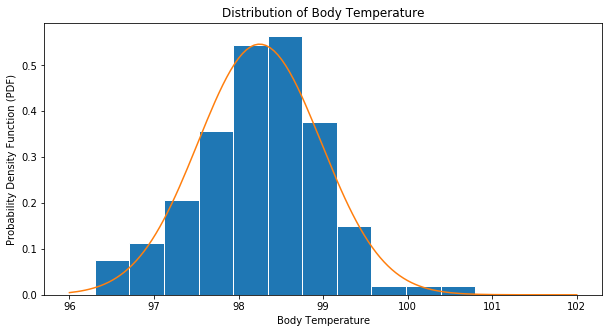

In [3]:
# histogram of temperature. (Normal PDF check)
temp = df.temperature

plt.figure(figsize=(10,5))
# plot normed histogram
plt.hist(temp, int(np.sqrt(len(temp))), edgecolor='w', density=True)

# find minimum and maximum of xticks, so we know
# where we should compute theoretical distribution
xt = plt.xticks()[0]  
xmin, xmax = min(xt), max(xt)  
lnspc = np.linspace(xmin, xmax, len(temp))

# fit the normal distribution
m, s = stats.norm.fit(temp) # get mean and standard deviation  
pdf_g = stats.norm.pdf(lnspc, m, s) # now get theoretical values in our interval  
plt.plot(lnspc, pdf_g, label="Norm") # plot it

plt.xlabel('Body Temperature')
plt.ylabel('Probability Density Function (PDF)')
plt.title('Distribution of Body Temperature');

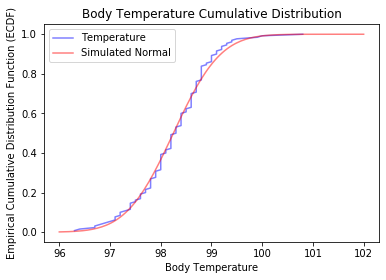

In [4]:
# check ECDF
def ecdf(array):
    x = np.sort(array)
    y = np.arange(1, len(array)+1)/len(array)

    return x,y

#compute CDF for body temperature and the simulated normal distribution data
x_temp, y_temp = ecdf(temp)

# CDF of normal
cdf_g = stats.norm.cdf(lnspc, m, s) # now get theoretical values in our interval  

#plot CDF of body temperature and the simulated normal distribution data
plt.plot(x_temp, y_temp, color='blue', alpha=0.5)
plt.plot(lnspc, cdf_g, color='red', alpha=0.5) # plot it

#annotation
plt.xlabel('Body Temperature')
plt.ylabel('Empirical Cumulative Distribution Function (ECDF)')
plt.legend(('Temperature','Simulated Normal'),loc=2)
plt.title('Body Temperature Cumulative Distribution');

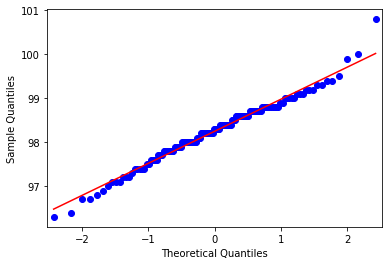

In [5]:
# qq plot
from statsmodels.graphics.gofplots import qqplot
fig = qqplot(temp, line='s')

Seen from above PDF plot, ECDF plot and QQ-plot comparing distribution of temperature data and theoretical normal distribution, the temperature data is not normally distributed. Right tail has one extreme value.

### 2. Is the sample size large? Are the observations independent? 

Sample size 130 is larger than 30, which is generally considered to be the boundary between small and large samples. This sample is considered as large.
Since this sample is drawn to estimate the true temperature of the population, which is the entire human being. Therefore, based on the 10% condition in statistics (sample sizes should be no more than 10% of the population), it's safe to consider the observations in this sample as independent.

### 3. Is the true population mean really 98.6 degrees F? 

In [6]:
print(m)
print(s)

98.24923076923075
0.730357778905038


**Hypothesis test:**
$$ H_0: \mu = 98.6 $$
$$ H_a: \mu \neq 98.6 $$

In [7]:
# hypothesis test using bootstrap
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

# get multiple bootstrap replicates
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""
    
    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

mean_pop = 98.6

np.random.seed(42)

mean_bs = draw_bs_reps(temp, np.mean, size=10000)
p = np.sum(mean_bs == mean_pop)/len(mean_bs)
print("Two-sided p value for bootstrap hypothesis test: {}.".format(p))

Two-sided p value for bootstrap hypothesis test: 0.0.


Bootstrap hypothesis test shows the p value is 0. Then the null hypothesis (population mean is 98.6) is rejected.

One-sample test should be used here because there is only one population mean we need to estimate (compare one set of data to a single number). All samples are drawn from one population.

In [8]:
# One-Sample test

# z-test
z_score = (m - 98.6)/(s/np.sqrt(len(df.temperature)))
p_value = stats.norm.cdf(z_score)
print('z-statistic = ', z_score)
print('Two-sided p-value of z-test is {}.'.format(2*p_value))

# t-test
resultsarray = stats.ttest_1samp(df.temperature, 98.6)
print('\nt-statistic = ', resultsarray[0])
print('Two-sided p-value of t-test is {}.'.format(resultsarray[1]))

z-statistic =  -5.4759252020785585
Two-sided p-value of z-test is 4.3523151658713056e-08.

t-statistic =  -5.4548232923645195
Two-sided p-value of t-test is 2.4106320415561276e-07.


In comparison, both $z$-test and $t$-test generate similiar critical values and close-to-zero $p$-values, because when sample size is much larger than 30, $t$ distribution approximately approaches $z$ distribution. And the conclusions are the same: the null hypothesis (population mean is 98.6) is rejected. 

### 4. Draw a small sample of size 10 from the data and repeat both frequentist tests.

In [9]:
np.random.seed(42)
sample_10 = np.random.choice(df.temperature, size=10)

# One-Sample test

# z-test
m, s = stats.norm.fit(sample_10)
print('The sample mean is {:.1f} and standard deviation is {:.2f}.'.format(m, s))

z_score = (m - 98.6)/(s/np.sqrt(len(sample_10)))
p_value = stats.norm.cdf(z_score)
print('\nz-statistic = ', z_score)
print('Two-sided p-value of z-test is {}.'.format(2*p_value))

# t-test
resultsarray = stats.ttest_1samp(sample_10, 98.6)
print('\nt-statistic = ', resultsarray[0])
print('Two-sided p-value of t-test is {}.'.format(resultsarray[1]))

The sample mean is 98.0 and standard deviation is 0.53.

z-statistic =  -3.260780417008125
Two-sided p-value of z-test is 0.001111060453904971.

t-statistic =  -3.0934479202257976
Two-sided p-value of t-test is 0.012857704604809363.


There will be difference in decisions between $z$-test and $t$-test when sample size is low. In above sampling, the sample mean is 98.0 and standard deviation is 0.53. If set significant level at $\alpha=0.01$, the null hypotheis will be rejected using $z$-test but won't be rejected using $t$-test.

When sample size is below 30, the sample mean's distribution tends to be flat and deviated from normal distribution. In this case, $t$-test is approriate test for population mean.

### 5. At what temperature should we consider someone's temperature to be "abnormal"?

In [10]:
# bootstrap method
conf_int = np.percentile(mean_bs, [2.5, 97.5])
print('95% confidence interval is', conf_int, 'degree F')
print("If someone's temperature is out of ", conf_int, " degree F, it should be considered 'abnormal'")

95% confidence interval is [98.12461538 98.37384615] degree F
If someone's temperature is out of  [98.12461538 98.37384615]  degree F, it should be considered 'abnormal'


In [11]:
# Frequentist approach
#the margin of error and confidence interval is for invidual temperature, therefore the sample size is 1
n = 1

#compute the margin of error
error = 1.96 * np.std(df.temperature) / np.sqrt(n)

#compute the confidence interval, here sample mean is used to estimate the population mean
conf_int = np.mean(df.temperature) + np.array([-1, 1]) * error

print("95% confidence interval is", conf_int, 'degree F')
print("If someone's temperature is out of ", conf_int, " degree F, it should be considered 'abnormal'")

95% confidence interval is [96.81772952 99.68073202] degree F
If someone's temperature is out of  [96.81772952 99.68073202]  degree F, it should be considered 'abnormal'


### 6.  Is there a significant difference between males and females in normal temperature?

In [12]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


**Hypothesis test:**
$$ H_0: \mu_m = \mu_f $$
$$ H_a: \mu_m \neq \mu_f $$

In [13]:
# Frequentist approach

temp_m = df.temperature[df.gender=='M']
temp_f = df.temperature[df.gender=='F']

t_value, p_value = stats.ttest_ind(temp_m, temp_f)
print('t-statistic = ', t_value)
print('Two-sided p-value of t-test is {}.'. format(p_value))

t-statistic =  -2.2854345381656103
Two-sided p-value of t-test is 0.02393188312239561.


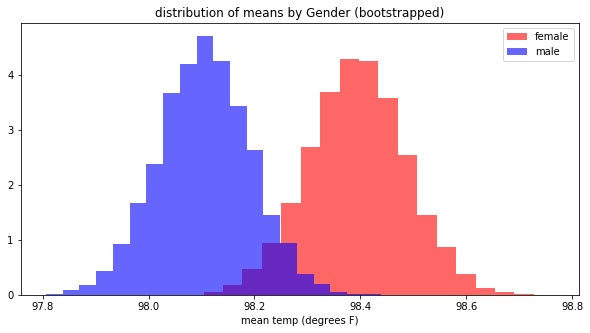

In [14]:
# booststrap approach
np.random.seed(42)

mean_bs_m = draw_bs_reps(temp_m, np.mean, size=10000)
mean_bs_f = draw_bs_reps(temp_f, np.mean, size=10000)

#histogram
plt.figure(figsize=(10,5))
plt.hist(mean_bs_f, bins = 20, density=True, color='red', alpha = .6, label='female')
plt.hist(mean_bs_m, bins = 20, density=True, color='blue', alpha = .6, label='male')
plt.title("distribution of means by Gender (bootstrapped)")
plt.xlabel('mean temp (degrees F)')
plt.legend();

In [15]:
#we want to test null hypothesis that males and females have same mean temp
#first shift the mean of our two sample sets to match the mean of the set as a while
temp_f_shifted = temp_f - np.mean(temp_f) + np.mean(df.temperature)
temp_m_shifted = temp_m - np.mean(temp_m) + np.mean(df.temperature)

#get new bootstrapped means
np.random.seed(42)
mean_shifted_f = draw_bs_reps(temp_f_shifted, np.mean, size=10000)
mean_shifted_m = draw_bs_reps(temp_m_shifted, np.mean, size=10000)

#get original diff of means to test against
sample_diff_mean= temp_f.mean() - temp_m.mean()
diff_means = mean_shifted_f - mean_shifted_m
p_value = np.sum(diff_means >= sample_diff_mean)/(len(diff_means))
print('p-value of bootstrap is {}.'. format(p_value))

p-value of bootstrap is 0.0102.


In both Frequestist and bootstrap approaches, if set significance level at $\alpha=0.05$, the null hypothesis is rejected. Then there is a significant difference between males and females in normal temperature.